# Machine learning for Drug  Patient Recommender 

the aim for this report is to create a model that can predict the type of drug that each patient should use according to this data,
in this case we will be using Decision trees a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.


In [32]:
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Let's import the data that we will be using and have a look how this data is stuctured, this dataset can be found in [Kaggle](https://www.kaggle.com/datasets/ammaraahmad/top-10-machine-learning-datasets?select=drug.csv)

In [33]:
data=pd.read_csv('drug.csv')
data.head()


,age,sex,bp,cholesterol,Na_to_K,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<br>
we start by calling the function that we are going to use and assign it to arbol.

In [34]:
arbol=tree.DecisionTreeClassifier()

Before to apply our model we need to convert the categorical variables into numerical variables.  we are going to use the replace method,
for the columns sex  , F=0 and M=1 
<br>
after we will make the next assignments:
<br>
Low=0
Normal=1
High=2

In [35]:
data1=data.replace('F',0).replace('M',1).replace('LOW',0).replace('NORMAL',1).replace('HIGH',2)

data1.head()

,age,sex,bp,cholesterol,Na_to_K,drug
0,23,0,2,2,25.355,drugY
1,47,1,0,2,13.093,drugC
2,47,1,0,2,10.114,drugC
3,28,0,1,2,7.798,drugX
4,61,0,0,2,18.043,drugY


<br>
Now as we can see all variables have been converted to numerical excepts for the column drug that we will keep it as it is .
After this we will split our data into two, train and test data, train will consist in the 80% of the data and we will be using the rest 20% for testing and use the method .fit to adjust the values to the model.

In [36]:

x=data1[['age','sex','bp','cholesterol','Na_to_K']]
y=data1['drug']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
arbol.fit(x_train,y_train)



DecisionTreeClassifier()

the second-last it will be to check the accuracy of the method and see the predictions side by side with the actual values'

In [37]:
yhat=arbol.predict(x_test)
accuracy_score(y_test,yhat)

1.0

In [64]:
pd.DataFrame(data={'predictions': yhat, 'actual': y_test})

,predictions,actual
117,drugX,drugX
179,drugY,drugY
23,drugY,drugY
46,drugA,drugA
147,drugA,drugA
139,drugX,drugX
13,drugY,drugY
71,drugY,drugY
192,drugY,drugY
77,drugY,drugY


As we can see we get an accuracy of more that 95% which is really good  and we can proceed to plot our model.

[Text(0.625, 0.9, 'Na_to_K <= 14.829\ngini = 0.718\nsamples = 160\nvalue = [18, 15, 16, 44, 67]\nclass = drugY'),
 Text(0.5, 0.7, 'bp <= 1.5\ngini = 0.683\nsamples = 93\nvalue = [18, 15, 16, 44, 0]\nclass = drugX'),
 Text(0.25, 0.5, 'cholesterol <= 1.5\ngini = 0.391\nsamples = 60\nvalue = [0, 0, 16, 44, 0]\nclass = drugX'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]\nclass = drugX'),
 Text(0.375, 0.3, 'bp <= 0.5\ngini = 0.499\nsamples = 31\nvalue = [0, 0, 16, 15, 0]\nclass = drugC'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]\nclass = drugC'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'age <= 50.5\ngini = 0.496\nsamples = 33\nvalue = [18, 15, 0, 0, 0]\nclass = drugY'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]\nclass = drugC'),
 Text(0.75, 0.7, 'gini = 0.0\nsa

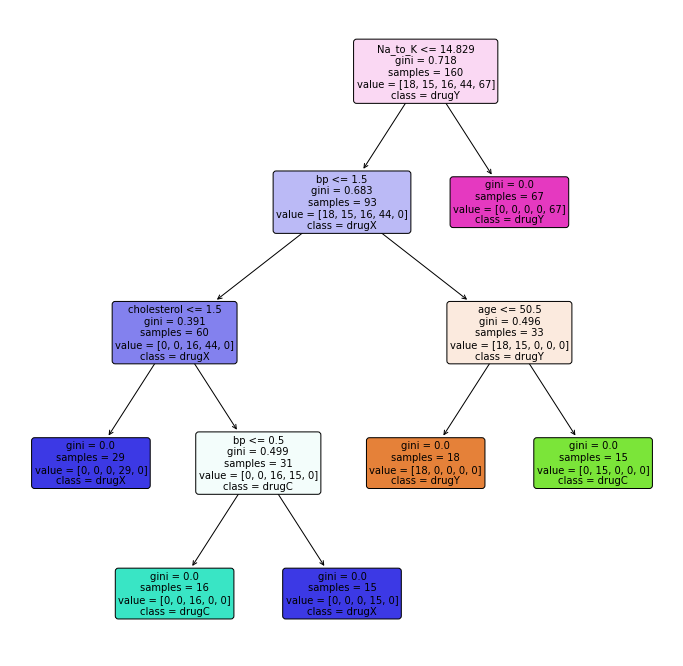

In [38]:
plt.figure(figsize=(12,12))
tree.plot_tree(arbol,class_names=y,feature_names=x.columns,rounded=True,filled=True,fontsize=10)

class_names takes the values of Y and features_names are the columns to predict Y.
 